Revisionary Project

For this example, we’ll use a linear regression on the scikit-learn database of California housing data.

Cross validation

LOOCV

https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd

In [1]:
from sklearn import datasets
calihouses  = datasets.fetch_california_housing()
data = calihouses.data

In [2]:
import pandas as pd
import numpy as np

col = calihouses.feature_names
df = pd.DataFrame(data, columns=col)

print(df.shape)
print(df.head())

(20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [3]:
y = calihouses.target

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split(df,y,test_size =0.25)

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


In [4]:
from timeit import default_timer as timer
start_ho = timer()

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

end_ho = timer()

time_ho = (end_ho - start_ho)

print(predictions)

[1.08094043 1.5687526  1.93950079 ... 2.35517658 2.71194651 2.93036382]


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('dark')

plot = sns.scatterplot(y_test, predictions)
plot.set(xlabel='Given',ylabel='Prediction')

x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [6]:
start_ho_score = timer()

from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, predictions)

print(ho_score)

end_ho_score = timer()

ho_score_time = (end_ho_score - start_ho_score)

-0.5405412157063616


In [7]:
X = np.array(df)

start_kfold = timer()

from sklearn.model_selection import cross_val_predict
lm_k = LinearRegression()
k_predictions = cross_val_predict(lm_k, X, y, cv=10)
print(k_predictions)

end_kfold = timer()

kfold_time = (end_kfold - start_kfold)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


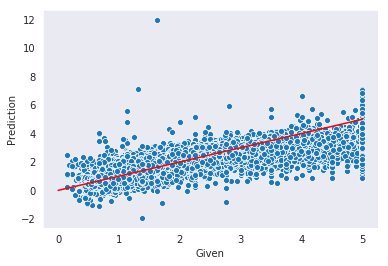

In [8]:
plot_k = sns.scatterplot(y, k_predictions)
plot_k.set(xlabel='Given',ylabel = 'Prediction')

x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

-0.550952429695666


/home/direwolf/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


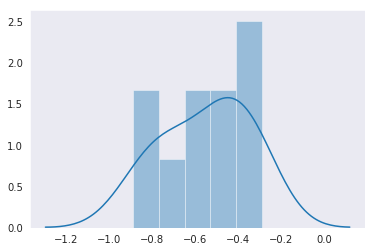

In [9]:
kfold_score_start = timer()

from sklearn.model_selection import cross_val_score
kfold_scores =cross_val_score(lm_k, X, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())

kfold_score_end = timer()

kfold_score_time = (kfold_score_end - kfold_score_start)

sns.distplot(kfold_scores, bins =5)

In [10]:
start_LOO = timer()

LOO_predictions = cross_val_predict(lm_k, X, y, cv=(len(X)))

end_LOO = timer()

LOO_time = (end_LOO - start_LOO)

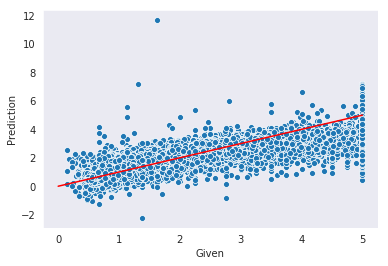

In [11]:
plot_LOO = sns.scatterplot(y, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')

x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [12]:
LOO_score_start = timer()

LOO_score = cross_val_score(lm_k, X, y, cv=(len(X)),scoring='neg_mean_squared_error').mean()
print(LOO_score)

LOO_score_end = timer()

LOO_score_time = (LOO_score_end - LOO_score_start)

-0.5282462043712454


In [13]:
print('Hold out method took',time_ho,'seconds to generate a model and',ho_score_time,'seconds to generate a MSE of',ho_score)
print('K-Fold out method took',kfold_time,'seconds to generate a model and',kfold_score_time,'seconds to generate a MSE of',kfold_scores.mean())
print('Leave One Out Cross Validation method took',LOO_time,'seconds to generate a model and',LOO_score_time,'seconds to generate a MSE of',LOO_score)

Hold out method took 2.370422115999986 seconds to generate a model and 0.000838329000032445 seconds to generate a MSE of -0.5405412157063616
K-Fold out method took 0.09173734600000216 seconds to generate a model and 0.08640644500002281 seconds to generate a MSE of -0.550952429695666
Leave One Out Cross Validation method took 163.455813277 seconds to generate a model and 128.12826711100007 seconds to generate a MSE of -0.5282462043712454


In [14]:
pd.DataFrame({'method':['Hold out','K-Fold','Leave One Out Cross Validation'],'time took':[time_ho,kfold_time,LOO_time],'seconds to generate a model':[ho_score_time,kfold_score_time,LOO_score_time],'seconds to generate a MSE':[ho_score,kfold_scores.mean(),LOO_score]})

,method,time took,seconds to generate a model,seconds to generate a MSE
0,Hold out,2.370422,0.000838,-0.540541
1,K-Fold,0.091737,0.086406,-0.550952
2,Leave One Out Cross Validation,163.455813,128.128267,-0.528246


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/jeffheaton/data/master/covtype.csv')

   elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [17]:
df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [19]:
X=df.loc[:,'elevation':'soil_type_40']
y=df['cover_type']

In [20]:
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [26]:
import time
from sklearn.metrics import accuracy_score
neigh.fit(X,y)
kFoldStart = time.time()
y_pred = cross_val_predict(neigh, X, y, cv = 200)
kFoldEnd = time.time()
kFoldTime = kFoldEnd - kFoldStart
print("K Fold Validation Accuracy is ", accuracy_score(y, y_pred))

K Fold Validation Accuracy is  0.8016822371999202


In [27]:
print(kFoldTime)

899.5259807109833


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
X_train = X_train.fillna(method='ffill')
y_train = y_train.fillna(method='ffill')

In [29]:
neigh.fit(X_train, y_train)
holdOutStart = time.time()
holdOutPredictions = neigh.predict(X_test)
holdOutEnd = time.time()
holdOutTime = holdOutEnd - holdOutStart
print("Hold Out Validation takes ", holdOutTime, " seconds")
print(accuracy_score(y_test, holdOutPredictions))

Hold Out Validation takes  19.435256004333496  seconds
0.9661281439324398
